## Machine Learning Using Decision Trees and Random Forests
### Data: Breast Cancer Wisconsin Diagnostic

We are going to be using Machine Learning (Decision Trees and Random Forests) to diagnose patients based on the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir ('C:\\Users\\mkorzec\Downloads')

from datetime import datetime

In [2]:
# Import the Data
data = pd.read_csv('CancerWI.csv')

In [3]:
# Explore the Data
data.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


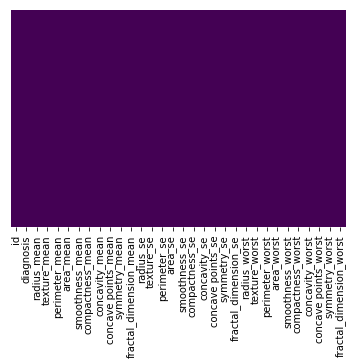

In [5]:
# Check for missing values
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

There are no missing values in the dataset

Text(0.5, 1.0, 'Diagnosis Distribution')

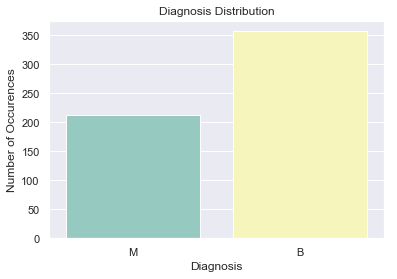

In [6]:
# Visualize the data
sns.set(style = 'darkgrid')
g = sns.countplot(x = "diagnosis", data = data, palette = "Set3")
plt.ylabel("Number of Occurences")
plt.xlabel("Diagnosis")
plt.title("Diagnosis Distribution")

In [7]:
# drop ID column from our dataset
data.drop('id', axis = 1, inplace = True)

### We have over 30 variables to visualize
It is going to be easier to separate them first and visualize them sepaprately.

In [8]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
print(len(data.columns))

31


In [10]:
means = data[['diagnosis', 'radius_mean', 'texture_mean', 'radius_worst', 'texture_worst']]

means2 = data[['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]

means3 = data[['diagnosis', 'concave points_mean', 'fractal_dimension_mean']]

In [11]:
melt_means = pd.melt(means, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means2 = pd.melt(means2, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")
melt_means3 = pd.melt(means3, id_vars = 'diagnosis', var_name = "Variables", value_name = "Value")

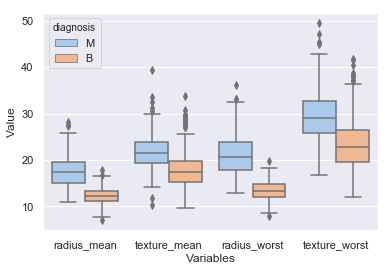

In [12]:
sns.boxplot(x = "Variables", y = "Value", data = melt_means, hue = 'diagnosis', palette = 'pastel')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

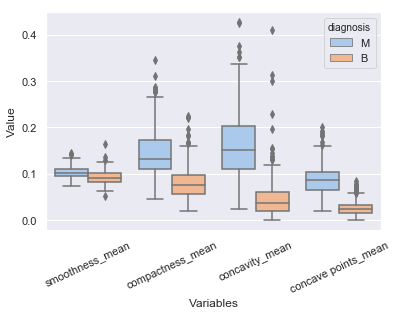

In [13]:
sns.boxplot(x = "Variables", y = "Value", 
            data = melt_means2, hue = 'diagnosis', 
            palette = 'pastel')

plt.xticks(rotation=25)

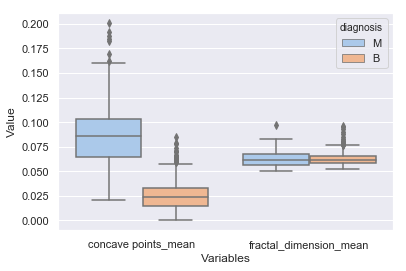

In [14]:
sns.boxplot(x = "Variables", y = "Value", data = melt_means3, hue = 'diagnosis', palette = 'pastel')

There are diffinitely some significant difference for some variables between M and B values

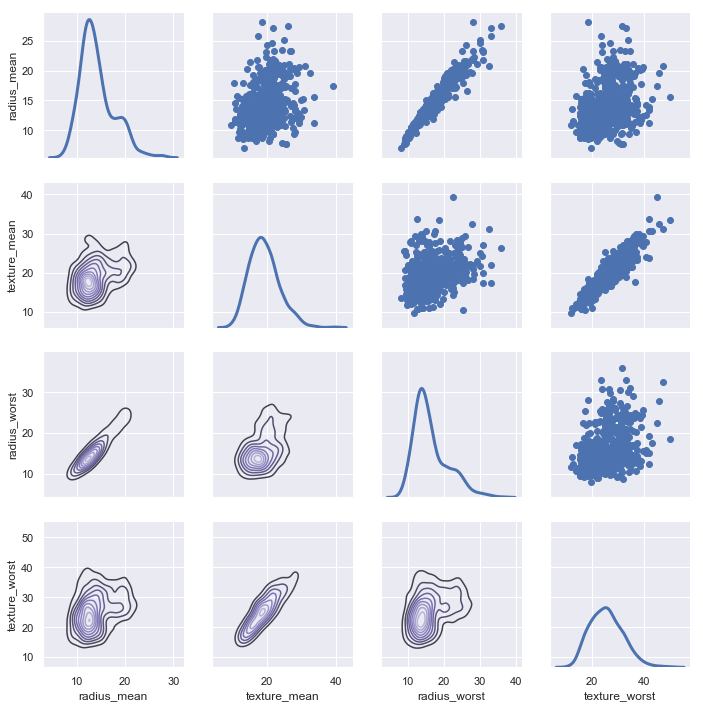

In [15]:
# We can also see the relationship between multiple variables at once
f = sns.PairGrid(means)
f = f.map_upper(plt.scatter)
f = f.map_lower(sns.kdeplot, cmap = "Purples_d")
f = f.map_diag(sns.kdeplot, lw = 3, legend = False)

There are tons of ways to visualize data like this.

Let's see some examples and explore some relationship between the variables

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

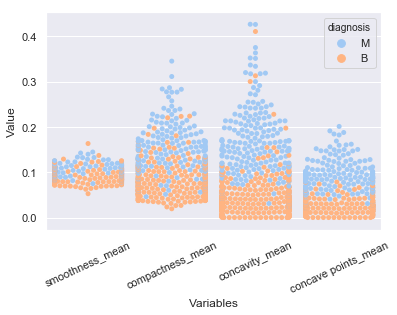

In [16]:
c = sns.swarmplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis', palette = 'pastel')
plt.xticks(rotation=25)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

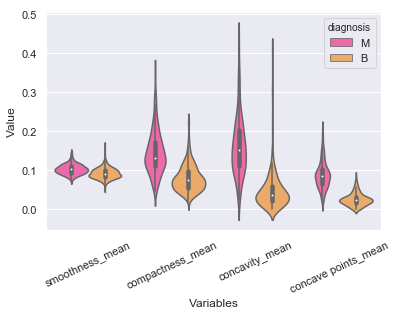

In [17]:
cv = sns.violinplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis', palette = 'spring')
plt.xticks(rotation=25)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

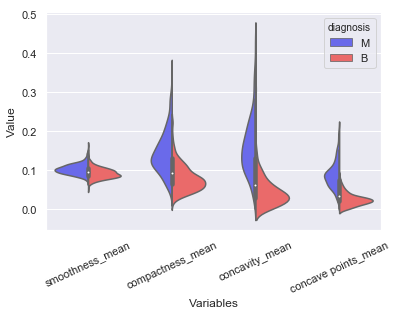

In [18]:
cv = sns.violinplot(x = "Variables", y = "Value", data = melt_means2, hue = 'diagnosis', palette = 'seismic', split = True)
plt.xticks(rotation=25)

We might also want to see specific relationships

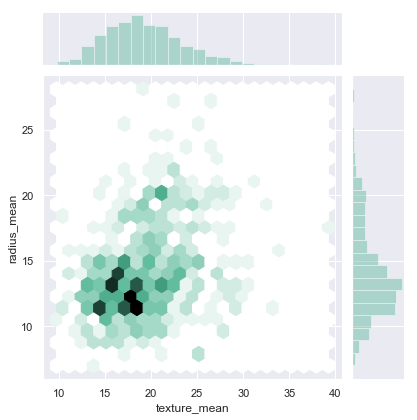

In [20]:
sns.jointplot(x = 'texture_mean', y = 'radius_mean', data = means, kind = 'hex', color = "#4CB391")

Lastly, let's see how all variable scorrelate to one another

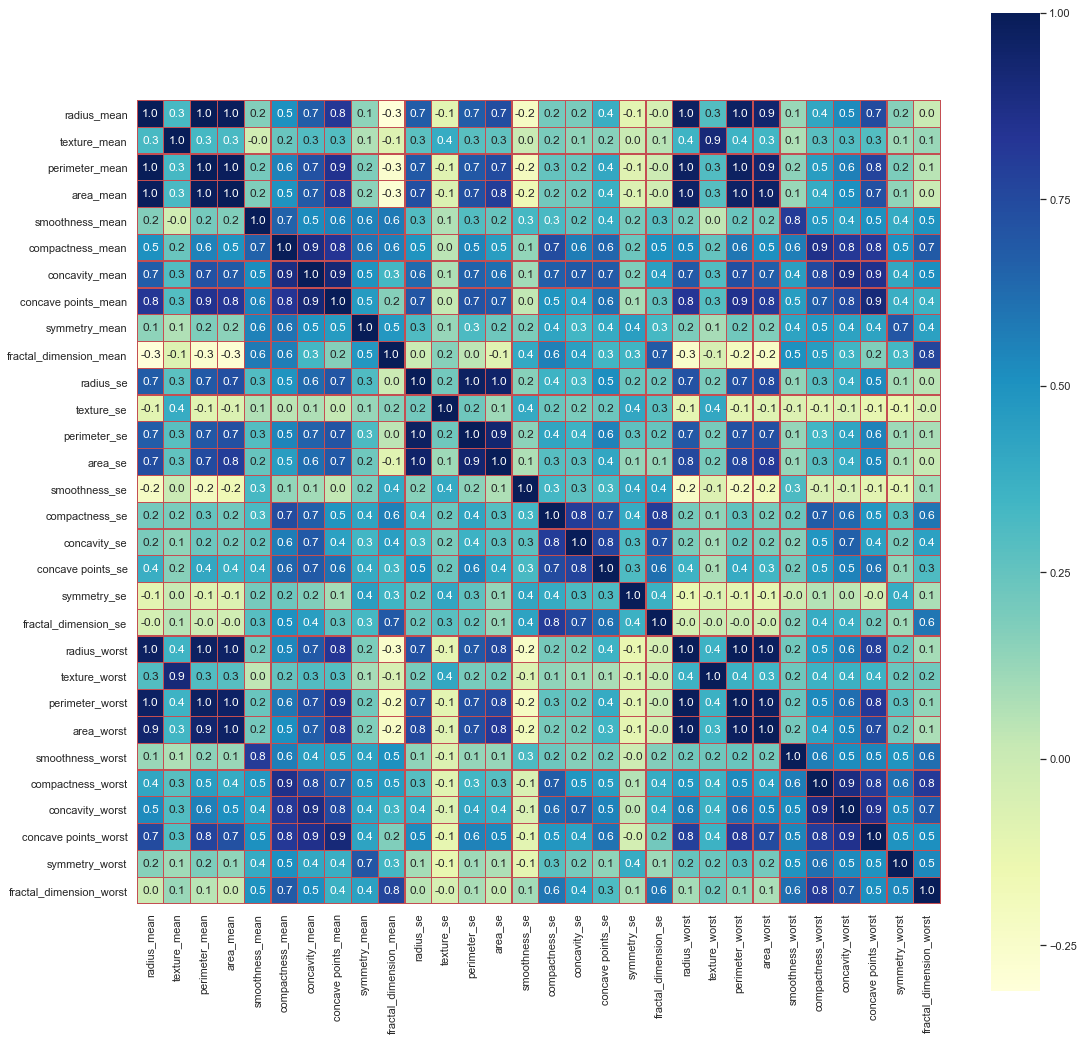

In [26]:
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, square = True, cmap = "YlGnBu", annot = True, fmt = '.1f', linewidths = .25, linecolor = 'r')

That's enough visualization

Let's get to the model building

## Model Building

## Feature Selection

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [33]:
sel.get_support()

array([ True, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [38]:
selected_feat = X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


## Refit model with new features

In [42]:
X = data[['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst']]

y = data['diagnosis']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
predictions = dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[113   3]
 [  3  52]]


              precision    recall  f1-score   support

           B       0.97      0.97      0.97       116
           M       0.95      0.95      0.95        55

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



96% accuracy is pretty good

The dataset is fairly big and Random Forests would probably give us even more accurate model

## Random Forests

In [49]:
rfc = RandomForestClassifier(n_estimators = 100)

In [50]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[112   4]
 [  1  54]]


              precision    recall  f1-score   support

           B       0.99      0.97      0.98       116
           M       0.93      0.98      0.96        55

   micro avg       0.97      0.97      0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [53]:
As expected, random forests gave us even more accurate model

SyntaxError: invalid syntax (<ipython-input-53-7e74852e0b76>, line 1)